In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw4.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 4: Logistic regression, hyperparameter optimization 
### Associated lectures: [Lectures 7, 8](https://github.com/UBC-CS/cpsc330-2024W1/tree/main/lectures) 

**Due date: [Feb 10, 11:59 pm](https://github.com/UBC-CS/cpsc330-2024W2?tab=readme-ov-file#deliverable-due-dates-tentative).**

## Imports 

In [2]:
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier

In [3]:
import hashlib


def my_sha1(text):
    return hashlib.sha1(text.encode("utf-8")).hexdigest()

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W2/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W2/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

_Points:_ 4

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 1: implementing `DummyClassifier`
<hr>
rubric={autograde}

In this course (unlike CPSC 340) you will generally **not** be asked to implement machine learning algorihtms (like logistic regression) from scratch. However, this exercise is an exception: you will implement the simplest possible classifier, `DummyClassifier`.
 
As a reminder, `DummyClassifier` is meant as a baseline and is generally a simple "model" you could "fit" to a dataset. All it does is predict the most popular class in the training set. So if there are more 0s than 1s it predicts 0 every time, and if there are more 1s than 0s it predicts 1 every time. For `predict_proba` it looks at the frequencies in the training set, so if you have 30% 0's and 70% 1's it predicts `[0.3 0.7]` every time. Thus, `fit` only looks at `y` (not `X`).

Below you will find starter code for a class called `MyDummyClassifier`, which has methods `fit()`, `predict()`, `predict_proba()` and `score()`. Your task is to fill in those four functions. To get you started, I have given you a `return` statement in each case that returns the correct data type: 
- `fit` returns nothing
- `predict` returns an array whose size is the number of examples
- `predict_proba` returns an array whose size is the number of examples x 2, and
- `score` returns a float

The next code block has some tests you can use to assess whether your code is working. 

I suggest starting with `fit` and `predict`, and making sure those are working before moving on to `predict_proba`. For `predict_proba`, you should return the frequency of each class in the training data. **Your `score` function should call your `predict` function**. Again, you can compare with `DummyClassifier` using the code below.

`sklearn`'s `DummyClassifier` works when you have more than two classes, and also works if the target values are encoded differently, for example as "cat", "dog", "eagle", etc. However, for the sake of simplifying this question, we will consider **binary classification** only. Furthermore, we will assume that these classes are encoded as 0 and 1. In other words, you can safely assume that the variable y contains only 0's and 1's

<div class="alert alert-warning">

Solution_1
    
</div>

In [4]:
class MyDummyClassifier:
    """
    A baseline classifier that predicts the most common class.
    The predicted probabilities come from the relative frequencies
    of the classes in the training data.

    This implementation only works when y only contains 0's and 1's.
    """

    def fit(self, X, y):
        y = y.astype(int)
        self.most_common = np.bincount(y).argmax()
        self.class_probs = np.bincount(y) / len(y)
        return None  

    def predict(self, X):
        predictions = np.zeros(X.shape[0])  # initializing with all predictions set to 0
        # Replace with your code
        predictions = np.full(X.shape[0], self.most_common)
        return predictions

    def predict_proba(self, X):
        probs = np.zeros((X.shape[0], 2))  # initializing all probabilities set to 0.
        # Replace with your code
        probs = np.tile(self.class_probs, (X.shape[0], 1))
        return probs  # Replace with your code

    def score(self, X, y):
        accuracy = None
        # Replace with your code
        return np.mean(self.predict(X) == y)

Below are some tests for `predict` using randomly generated data. You may want to run the cell a few times to make sure you explore the different cases (or automate this with a loop or random seeds).

In [5]:
# For testing, generate random data
n_train = 101
n_valid = 21
d = 5
X_train_dummy = np.random.randn(n_train, d)
X_valid_dummy = np.random.randn(n_valid, d)
y_train_dummy = np.random.randint(2, size=n_train)
y_valid_dummy = np.random.randint(2, size=n_valid)

my_dc = MyDummyClassifier()
sk_dc = DummyClassifier(strategy="prior")

my_dc.fit(X_train_dummy, y_train_dummy)
sk_dc.fit(X_train_dummy, y_train_dummy)

assert np.array_equal(my_dc.predict(X_train_dummy), sk_dc.predict(X_train_dummy))
assert np.array_equal(my_dc.predict(X_valid_dummy), sk_dc.predict(X_valid_dummy))

Below are some tests for `predict_proba`.

In [6]:
assert np.allclose(
    my_dc.predict_proba(X_train_dummy), sk_dc.predict_proba(X_train_dummy)
)
assert np.allclose(
    my_dc.predict_proba(X_valid_dummy), sk_dc.predict_proba(X_valid_dummy)
)

Below are some tests for `score`.

_Points:_ 10

In [7]:
assert np.isclose(
    my_dc.score(X_train_dummy, y_train_dummy), sk_dc.score(X_train_dummy, y_train_dummy)
)
assert np.isclose(
    my_dc.score(X_valid_dummy, y_valid_dummy), sk_dc.score(X_valid_dummy, y_valid_dummy)
)

In [8]:
grader.check("q1")

q1 results: All test cases passed!

<br><br><br><br>

## Exercise 2: Trump Tweets
<hr>

For the rest of this assignment we'll be working with a [dataset of Donald Trump's tweets](https://www.kaggle.com/austinreese/trump-tweets) as of June 2020. You should start by downloading the dataset. Unzip it and move the file `realdonaldtrump.csv` under the data directory in this folder. As usual, please do not submit the dataset when you submit the assignment. 

In [9]:
tweets_df = pd.read_csv("data/realdonaldtrump.csv", index_col=0)
tweets_df.head()

,link,content,date,retweets,favorites,mentions,hashtags
id,,,,,,,
1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917,NaN,NaN
1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267,NaN,NaN
1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13,19,NaN,NaN
1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11,26,NaN,NaN
1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1375,1945,NaN,NaN


In [10]:
tweets_df.shape

(43352, 7)

We will be trying to predict whether a tweet will go "viral", defined as having more than 10,000 retweets:

In [11]:
y = tweets_df["retweets"] > 10_000

To make predictions, we'll be using only the content (text) of the tweet. 

In [12]:
X = tweets_df["content"]

For the purpose of this assignment, you can ignore all the other columns in the original dataset.

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

### 2.1 Ordering the steps
rubric={points}

Let's start by building a model using `CountVectorizer` and `LogisticRegression`. The code required to do this has been provided below, but in the wrong order. 

**Your tasks:**
1. Rearrange the lines of code to correctly fit the model and compute the cross-validation score. 
2. Add a short comment above each step to describe what the code is doing.

<div class="alert alert-warning">

Solution_2.1
    
</div>

_Points:_ 5

<h1 style="color: red"> I don't know why but this cell below is locked so I copy and pasted into the cell one below this cell</h1>

In [13]:
# YOUR COMMENT HERE
countvec = CountVectorizer(stop_words="english")

# YOUR COMMENT HERE
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.6, random_state=123
)

# YOUR COMMENT HERE
cv_score = cross_val_score(pipe, X_train, y_train).mean()

# YOUR COMMENT HERE
pipe = make_pipeline(countvec, lr)

# YOUR COMMENT HERE
lr = LogisticRegression(max_iter=1000, random_state=123)

NameError: name 'pipe' is not defined

In [14]:
# Creating a countVectorizer transformer, removing some common english words to speed up and improve performance
countvec = CountVectorizer(stop_words="english")

# split the data into x and y, and test and training data, test size is 60%
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.6, random_state=123
)

# creating LogisticRegression model object
lr = LogisticRegression(max_iter=1000, random_state=123)

# creating a pipeline where it uses countVectorizer first and then fit the model 
pipe = make_pipeline(countvec, lr)

# storing cross validation score, using the pipeline, on the trainign data
cv_score = cross_val_score(pipe, X_train, y_train).mean()

<!-- END QUESTION -->

<br><br>

In [15]:
cv_score

0.8953863898500576

### 2.2 Baseline
rubric={autograde}

**Your tasks:**

1. Run 5-fold cross-validation with `sklearn`'s `DummyClassifier` on this dataset. Store the mean cross-validation score in a variable called `dummy_cv_score` given below.

> You should be able to use `MyDummyClassifier` above. But sklearn will likely complain if you try to pass it to `cross_val_score` or `cross_validate`. 

<div class="alert alert-warning">

Solution_2.2
    
</div>

_Points:_ 2

In [16]:
dummy = DummyClassifier(strategy="most_frequent")


dummy_cv_score = cross_val_score(dummy, X_train, y_train, cv = 5).mean()
dummy_cv_score

0.7423875432525952

In [17]:
grader.check("q2.2")

q2.2 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 2.3 Discussion
rubric={points}

**Your tasks:**

1. Compare the `DummyClassifier` score to what you got from logistic regression above. Does logistic regression seem to be doing anything useful?
2. Above we averaged the scores from the 5 folds of cross-validation of logistic regression. Print out the 5 individual scores. Reminder: `sklearn` calls them `"test_score"` but they are really (cross-)validation scores. 
3. Are the 5 scores close to each other or spread far apart? (This is a bit subjective, answer to the best of your ability.) 
4. How does the size of this dataset (number of rows) compare to [the cities dataset](https://github.com/UBC-CS/cpsc330-2023W1/blob/main/lectures/data/canada_usa_cities.csv) we have been using in the lecture notes? How does this relate to the different sub-scores from the 5 folds?

<div class="alert alert-warning">

Solution_2.3
    
</div>

_Points:_ 4

_Type your answer here, replacing this text._

In [18]:
print("dummyclassifier", dummy_cv_score)
print("LogisticRegression", cv_score)

dummyclassifier 0.7423875432525952
LogisticRegression 0.8953863898500576


LogisticRegression does better job of predicting tweets that goes viral.

In [19]:
pd.DataFrame(cross_validate(pipe, X_train, y_train, cv=5))

,fit_time,score_time,test_score
0,0.376550,0.069241,0.891869
1,0.350436,0.061456,0.900231
2,0.351454,0.070680,0.895617
3,0.362921,0.065192,0.889562
4,0.366013,0.061823,0.899654


scores are close to each other

The more data samples we have more stable the cross validation scores are, which is equivalent to the test_scores being close to each other. The city-data had less data samples, so when cross-validation is done on that data, there are even fewer samples which leads to higher risk of underfitting.

<!-- END QUESTION -->

<br><br>

### 2.4 Probability scores
rubric={autograde}

Here we train a logistic regression classifier on the entire training set: 

In [20]:
pipe_lr = make_pipeline(
    CountVectorizer(stop_words="english"),
    LogisticRegression(max_iter=1000, random_state=123),
)
pipe_lr.fit(X_train, y_train);

**Your tasks:**

1. Using this model, find the tweet in the **test set** with the highest predicted probability of being viral. Store the tweet and the associated probability in the variables `tweet` and `prob`, respectively. 

> Reminder: you are free to reuse/adapt code from lecture. Please add in a small attribution, e.g. "From Lecture 7".

<div class="alert alert-warning">

Solution_2.4
    
</div>

_Points:_ 4

<h1>--------------just for practice------exploring data-------------------------</h1>

In [21]:
viral_tweets_predicted = pipe_lr.predict(X_test)
viral_tweets_predicted

array([ True,  True,  True, ..., False, False, False])

In [22]:
feature_names = pipe_lr.named_steps["countvectorizer"].get_feature_names_out()
feature_names

array(['00', '000', '000hermansjr000', ..., 'सम', 'हम', 'हर'],
      dtype=object)

In [23]:
X_test[viral_tweets_predicted]

id
1267246821597941764                                           FAKE NEWS!
1248474879227097094    Thank you Frank. It’s ABC Fake News. They knew...
1177357479954526208    No one has done more behind the scenes for STR...
1053074465150578688    Will be landing soon. Looking forward to seein...
1121021160827887616    Mexico’s Soldiers recently pulled guns on our ...
                                             ...                        
594204409707503616     Thank you. https://twitter.com/ClassicHarbor/s...
727093442325680128     Crooked Hillary Clinton said she is used to "d...
778553790568001540     It is a MOVEMENT - not a campaign. Leaving the...
1024112670427889664    MAKING AMERICA GREAT AGAIN!pic.twitter.com/OnM...
1236972698313666565    A great book, support Charlie, BUY IT! Already...
Name: content, Length: 6525, dtype: object

<h1>---------------------------------------------------------------------------</h1>

In [24]:
pipe_lr.classes_

array([False,  True])

In [25]:
true_probs = pipe_lr.predict_proba(X_test)[:,1]
true_probs

array([0.56167711, 0.98786534, 0.59222924, ..., 0.0019337 , 0.13821946,
       0.00212434])

In [26]:
highest_prob_index = np.argmax(true_probs)

In [27]:
tweet = X_test.iloc[highest_prob_index]
tweet

'There was No Collusion with Russia (except by the Democrats). When will this very expensive Witch Hunt Hoax ever end? So bad for our Country. Is the Special Counsel/Justice Department leaking my lawyers letters to the Fake News Media? Should be looking at Dems corruption instead?'

In [28]:
prob = true_probs[highest_prob_index]
prob

0.9999999830416225

In [29]:
grader.check("q2.4")

q2.4 results: All test cases passed!

<br><br>

### 2.5 Coefficients
rubric={autograde}

We can extract the `CountVectorizer` and `LogisticRegression` objects from the `Pipeline` object as follows:

In [30]:
vec_from_pipe = pipe_lr.named_steps["countvectorizer"]
lr_from_pipe = pipe_lr.named_steps["logisticregression"]

**Your tasks:**

Using these extracted components above, get the five words with the highest coefficients and 5 words with smallest coefficients. Store them as lists in `top_5_words` and `bottom_5_words` variables, respectively. 

<div class="alert alert-warning">

Solution_2.5
    
</div>

_Points:_ 4

In [31]:
feature_names

array(['00', '000', '000hermansjr000', ..., 'सम', 'हम', 'हर'],
      dtype=object)

In [32]:
coeffs = lr_from_pipe.coef_.flatten()

In [33]:
coeffs_df = pd.DataFrame(coeffs, index=feature_names, columns=["coefficient"])

In [34]:
coeffs_df_sorted = coeffs_df.sort_values(by="coefficient", ascending=False)
coeffs_df_sorted

,coefficient
democrats,2.522409
transcripts,2.416380
harassment,2.393406
coronavirus,2.200156
fake,2.070058
...,...
thanks,-1.820247
donaldtrump,-1.988505
trump2016pic,-2.003314
barackobama,-2.196487


In [35]:
top_5_words_df = coeffs_df_sorted[:5] # Store them as a list
bottom_5_words_df = coeffs_df_sorted[-5:] # Store them as a list

In [36]:
top_5_words = top_5_words_df.index.tolist()
top_5_words

['democrats', 'transcripts', 'harassment', 'coronavirus', 'fake']

In [37]:
bottom_5_words = bottom_5_words_df.index.tolist()
bottom_5_words

['thanks', 'donaldtrump', 'trump2016pic', 'barackobama', 'realdonaldtrump']

In [38]:
grader.check("q2.5")

q2.5 results: All test cases passed!

<br><br>

### 2.6 Running a cross-validation fold without sklearn tools 
rubric={autograde}

Sklearn provides a lot of useful tools like `make_pipeline` and `cross_validate`, which are awesome. But with these fancy tools it's also easy to lose track of what is actually happening under the hood. 

**Your tasks:**

1. Compute logistic regression's validation score on the first fold, that is, train on 80% and validate on 20% of the training data (`X_train`) without using sklearn `Pipeline` or `cross_validate` or `cross_val_score`. Store the score of the fold in a variable called `fold_score`. Recall that `cross_validation` in `sklearn` does not shuffle the data by default.    

You should start with the following `CountVectorizer` and `LogisticRegression` objects, as well as `X_train` and `y_train` (which you should further split with `train_test_split` and `shuffle=False`):
> Note: avoid assigning the variable names `X_train`, `y_train`, `X_test`, `y_test` to your folds when you call `train_test_split`. You'll be using those again later in the assignment.

In [39]:
countvec = CountVectorizer(stop_words="english")
lr = LogisticRegression(max_iter=1000, random_state=123)

> Meta-comment: you might be wondering why we're going into "implementation" here if this course is about _applied_ ML. In CPSC 340, we would go all the way down into `LogisticRegression` and understand how `fit` works, line by line. Here we're not going into that at all, but I still think this type of question (and Exercise 1) is a useful middle ground. I do want you to know what is going on in `Pipeline` and in `cross_validate` even if we don't cover the details of `fit`. To get into logistic regression's `fit` requires a bunch of math; here, we're keeping it more conceptual and avoiding all those prerequisites.

<div class="alert alert-warning">

Solution_2.6
    
</div>

_Points:_ 8

In [40]:
X_train_new = countvec.fit_transform(X_train)

In [41]:
X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train_new, y_train, test_size=0.2, shuffle=False)

In [42]:
lr.fit(X_train_train,y_train_train)

LogisticRegression(max_iter=1000, random_state=123)

In [43]:
y_pred = lr.predict(X_train_test)
y_pred

array([False, False, False, ..., False, False, False])

In [44]:
from sklearn.metrics import accuracy_score
fold_score = accuracy_score(y_train_test, y_pred)

In [45]:
fold_score

0.9008073817762399

In [46]:
grader.check("q2.6")

q2.6 results: All test cases passed!

<br><br><br><br>

## Exercise 3: Hyperparameter optimization
<hr>

<!-- BEGIN QUESTION -->

### 3.1 Optimizing `max_features` of `CountVectorizer`
rubric={points}

The following code varies the `max_features` hyperparameter of `CountVectorizer` and makes a plot (with the x-axis on a log scale) that shows train/cross-validation scores vs. `max_features`. It also prints the results. 

**Your tasks:**
- Based on the plot/output, what value of `max_features` seems best? Briefly explain.

> The code may take a minute or two to run. You can uncomment the `print` statement if you want to see it show the progress.

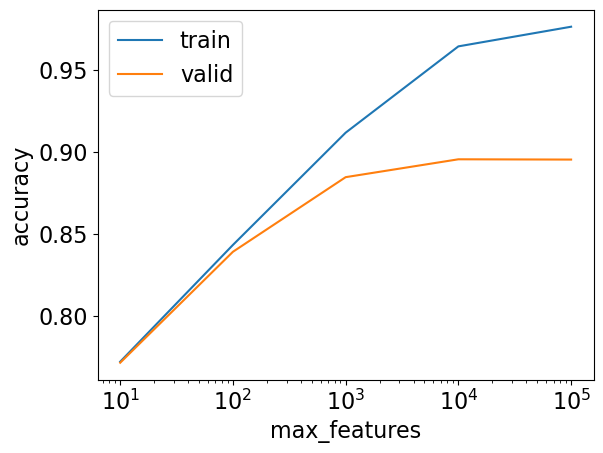

In [47]:
train_scores = []
cv_scores = []

max_features = [10, 100, 1000, 10_000, 100_000]

for mf in max_features:
    #     print(mf)
    pipe = make_pipeline(
        CountVectorizer(stop_words="english", max_features=mf),
        LogisticRegression(max_iter=1000, random_state=123),
    )
    cv_results = cross_validate(pipe, X_train, y_train, return_train_score=True)
    train_scores.append(cv_results["train_score"].mean())
    cv_scores.append(cv_results["test_score"].mean())

plt.semilogx(max_features, train_scores, label="train")
plt.semilogx(max_features, cv_scores, label="valid")
plt.legend()
plt.xlabel("max_features")
plt.ylabel("accuracy");

In [48]:
pd.DataFrame({"max_features": max_features, "train": train_scores, "cv": cv_scores})

,max_features,train,cv
0,10,0.772131,0.771511
1,100,0.843339,0.839158
2,1000,0.911794,0.884660
3,10000,0.964418,0.895559
4,100000,0.976399,0.895386


<div class="alert alert-warning">

Solution_3.1
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

max_features = 10,000 might be the best, because beyond that point, there is not significant improvement, and it is just overfitting.<br>
validation accuracy is about 90% and train accurac is about 96%.<br>
It will take longer time (gets slower) if we increase the number of features.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 3.2 Optimizing `C` of `LogisticRegression`
rubric={points}

The following code varies the `C` hyperparameter of `LogisticRegression` and makes a plot (with the x-axis on a log scale) that shows train/cross-validation scores vs. `C`. 

**Your tasks:**

- Based on the plot, what value of `C` seems best? Briefly explain. 

> The code may take a minute or two to run. You can uncomment the `print` statement if you want to see it show the progress.

In [ ]:
train_scores = []
cv_scores = []

C_vals = 10.0 ** np.arange(-1.5, 2, 0.5)

for C in C_vals:
    #     print(C)
    pipe = make_pipeline(
        CountVectorizer(stop_words="english"),
        LogisticRegression(max_iter=1000, C=C, random_state=123),
    )
    cv_results = cross_validate(pipe, X_train, y_train, return_train_score=True)

    train_scores.append(cv_results["train_score"].mean())
    cv_scores.append(cv_results["test_score"].mean())

plt.semilogx(C_vals, train_scores, label="train")
plt.semilogx(C_vals, cv_scores, label="valid")
plt.legend()
plt.xlabel("C")
plt.ylabel("accuracy");

In [ ]:
pd.DataFrame({"C": C_vals, "train": train_scores, "cv": cv_scores})

<div class="alert alert-warning">

Solution_3.2
    
</div>

_Points:_ 2

around 10^0 which is 1, because beyond that point, the validation accuracy starts to go down and it will lead to overfitting 

<!-- END QUESTION -->

<br><br>

### 3.3 Hyperparameter optimization 
rubric={autograde}

Start with the pipeline `pipe` below.

**Your tasks:**
- Create a `GridSearchCV` object named `grid_search` to jointly optimize `max_features` of `CountVectorizer` and `C` of `LogisticRegression` across all the combinations of values we tried above. 
- What are the best values of `max_features` and `C` according to your grid search? Store them in variables `best_max_features` and `best_C`, respectively.  
- Store the best score returned by the grid search in a variable called `best_score`. 

> The code might be a bit slow here. Setting `n_jobs=-1` should speed it up if you have a multi-core processor.

In [ ]:
pipe_lr = make_pipeline(
    CountVectorizer(stop_words="english"),
    LogisticRegression(max_iter=1000, random_state=123),
)

<div class="alert alert-warning">

Solution_3.3
    
</div>

_Points:_ 8

In [ ]:
param_grid = {
    "countvectorizer__max_features": [10, 100, 1000, 10_000, 100_000],
    "logisticregression__C":10.0 ** np.arange(-1.5, 2, 0.5)
}
    
grid_search = GridSearchCV(pipe_lr, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
best_max_features = 10000
best_C = 1.0
best_score = 0.8955594002306805

In [ ]:
grader.check("q3.3")

<br><br>

<!-- BEGIN QUESTION -->

### 3.4 Discussion 
rubric={points}

- Do the best values of hyperparameters found by Grid Search agree with what you found in 3.1 and 3.2? 
- Generally speaking, _should_ these values agree with what you found in parts  3.1 and 3.2? Why or why not? 

<div class="alert alert-warning">

Solution_3.4
    
</div>

_Points:_ 2

Best C value and the number of max_features aligns with what I found in 3.1 and 3.2.
Those values should agree with what I found in 3.1 and 3.2, in 3.1 and 3.2 we visualized the train score and the validation score using with different max_features and C value, that way we can save up time to wait for the GridSearch to complete the hyperparameter optimization, which takes quite a long time.
Those values agreeing to each other, means that we can always visualize the scores to optimize the parameter, and we can confirm the value using gridsearch if we wish to.

<!-- END QUESTION -->

<br><br>

### 3.5 Test score
rubric={autograde}

**Your tasks:**
- Evaluate your final model on the test set. Store the test accuracy in the variable called `test_score`.

<div class="alert alert-warning">

Solution_3.5
    
</div>

_Points:_ 2

In [ ]:
pipe_lr = make_pipeline(
    CountVectorizer(stop_words="english", max_features = best_max_features),
    LogisticRegression(max_iter=1000, random_state=123, C = best_C),
)
pipe_lr.fit(X_train, y_train)

In [ ]:
pipe_lr.score(X_test,y_test)

In [ ]:
test_score = pipe_lr.score(X_test,y_test)

In [ ]:
grader.check("q3.5")

<br><br>

<!-- BEGIN QUESTION -->

### 3.6 Discussion
rubric={points}

- How does your test accuracy compare to your validation accuracy? 
- If they are different: do you think this is because you "overfitted on the validation set", or simply random luck?

<div class="alert alert-warning">

Solution_3.6
    
</div>

_Points:_ 2

0.8955594002306805 is the score we got using cross-validation meaning we only used train data<br>
0.891780716592342 is the score we got from test dataset<br>
so, a slight overfitting on the validation set


<!-- END QUESTION -->

<br><br><br><br>

<!-- BEGIN QUESTION -->

## Exercise 4: Very short answer questions
<hr>
rubric={points}

Each question is worth 2 points. Max 2 sentences per answer.

1. What is the problem with calling `fit_transform` on your test data with `CountVectorizer`? 
2. If you could only access one of `predict` or `predict_proba`, which one would you choose? Briefly explain.
3. What are two advantages of `RandomizedSearchCV` over `GridSearchCV`?

<div class="alert alert-warning">

Solution_4
    
</div>

_Points:_ 6

1. if I call fit_transform with CountVectorizer on my test data, not train data, the transformer is learning from the test data which should have been kept untouched. so it is a data leakage
2. predic_proba, because it gives us more information. .predict() gives us only 0 or 1, for binary classification, but predict_proba gives us probabilities for each classification. Using this given probabilities we can make our custom predict() method by deciding probability threshold. Instead of using default 0.5, we can make it so it outputs a certain classification if the probability goes beyond, for example, 0.8.
3. RandomizedSearchCV ramdomly samples from parameter space rather than exhaustively check all possibilities which makes it much faster

<!-- END QUESTION -->

<br><br><br><br>

**Before submitting your assignment, please make sure you have followed all the instructions in the Submission instructions section at the top.** 

Congratulations on finishing the homework! 

![](./img/eva-well-done.png)